In [74]:
from scipy import stats
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import json
import os
import random

In [75]:
PATH = './output/japan/similarity/'

def flatten_distance_matrix(numpy_array):
    arr = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
    return arr
full_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
    x = flatten_distance_matrix(npar)
    full_partial.extend(x)
full_partial = [x/100 for x in full_partial]

In [76]:
PATH = './output/india/pairwise/'

indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_partial.csv').to_numpy()
    x = flatten_distance_matrix(npar[i:i+5, i:i+5])
    indian_partial.extend(x)

In [77]:
indian_partial_sim = [1- (x / 100) for x in indian_partial]

In [78]:
pd.read_csv(PATH+'full_partial.csv')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,25,0,75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,0,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,12,37,0,37,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,12,0,37,37,12,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,37,37,0,37,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,37,37,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,37,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# shuffle one of the two arrays with n permutations
def permutations(a, b, statistic, n):
    p_values = []
    for i in range(n):
        c = random.sample(b, len(b))
        if(len(a)==len(c)):
            r, p = sp.pearsonr(a,c)
            if(r>statistic):
                p_values.append(p)
        else:
            print("Error! array lengths are not the same")
            return
    return p_values

In [80]:
a = full_partial
b = indian_partial_sim
n = 1000
r, p = sp.pearsonr(a,b)
statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
print(r, sig, n)

0.23837975535493597 0.0023835779826780774 1000


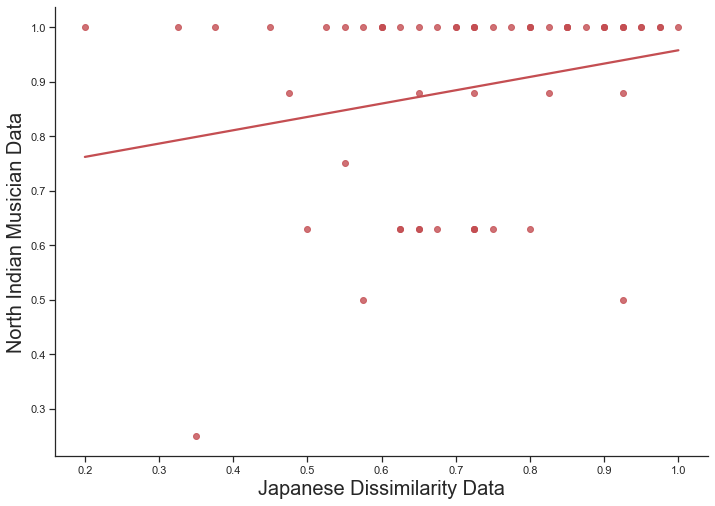

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
p = sns.regplot(x=full_partial, y=indian_partial_sim, ci=None, color="r")
p.set_xlabel("Japanese Dissimilarity Data", fontsize = 20)
p.set_ylabel("North Indian Musician Data", fontsize = 20)
sns.despine()  

In [73]:
PATH = './output/japan/feature/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
for i in range(1, len(feature_names)+1):
    label = feature_names[i-1].lower().replace(' ', '_')
    npar = pd.read_csv(PATH+label+'_average.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened = flatten_distance_matrix(npar[j:j+5, j:j+5])
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, full_partial)
    print(round(r,2), round(p,2))

0.05 0.71
0.07 0.59
-0.05 0.72
0.04 0.78
0.08 0.55
0.14 0.29
0.11 0.39
0.15 0.26
0.19 0.16
0.02 0.89
0.24 0.07
0.07 0.61
-0.05 0.68
